In [2]:
# !pip install pyBKT

In [3]:
# Import all required packages including pyBKT.models.Model!
import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt

### Basic Model Creation and Evaluation

In [4]:
model = Model(seed = 33, num_fits = 1)

Fetch Assistments and CognitiveTutor data to the local disk

In [5]:
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/as.csv', '.')
model.fetch_dataset('https://raw.githubusercontent.com/CAHLR/pyBKT-examples/master/data/ct.csv', '.')

#### Date exploring

In [6]:
ct_df = pd.read_csv('ct.csv', encoding = 'latin')
print(ct_df.columns)
ct_df.head(5)

Index(['Unnamed: 0', 'Row', 'Anon Student Id', 'Problem Hierarchy',
       'Problem Name', 'Problem View', 'Step Name', 'Step Start Time',
       'First Transaction Time', 'Correct Transaction Time', 'Step End Time',
       'Step Duration (sec)', 'Correct Step Duration (sec)',
       'Error Step Duration (sec)', 'Correct First Attempt', 'Incorrects',
       'Hints', 'Corrects', 'KC(Default)', 'Opportunity(Default)'],
      dtype='object')


,Unnamed: 0,Row,Anon Student Id,Problem Hierarchy,Problem Name,Problem View,Step Name,Step Start Time,First Transaction Time,Correct Transaction Time,Step End Time,Step Duration (sec),Correct Step Duration (sec),Error Step Duration (sec),Correct First Attempt,Incorrects,Hints,Corrects,KC(Default),Opportunity(Default)
0,1576,1927,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity1,2006-11-14 10:18:00.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,2006-11-14 10:18:05.0,5.00000,5.00000,NaN,1,0,0,1,Calculate unit rate,1
1,1580,1931,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-001,1,SimplifiedNumeratorQuantity2,2006-11-14 10:18:11.0,2006-11-14 10:18:17.0,2006-11-14 10:18:34.0,2006-11-14 10:18:34.0,23.00000,NaN,23.00000,0,1,0,1,Calculate unit rate,2
2,1596,1947,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity1,2006-11-14 10:50:52.0,2006-11-14 10:50:57.0,2006-11-14 10:51:11.0,2006-11-14 10:51:11.0,18.00000,NaN,18.00000,0,1,0,1,Calculate unit rate,3
3,1597,1948,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-012,1,SimplifiedNumeratorQuantity2,2006-11-14 10:51:11.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,2006-11-14 10:51:14.0,3.00000,3.00000,NaN,1,0,0,1,Calculate unit rate,4
4,1612,1963,745Yh,"Unit RATIO-PROPORTION, Section RATIO-PROPORTION-2",RATIO2-054,1,SimplifiedNumeratorQuantity2,2006-11-28 09:53:43.0,2006-11-28 09:53:47.0,2006-11-28 09:53:56.0,2006-11-28 09:53:56.0,13.00000,NaN,13.00000,0,1,0,1,Calculate unit rate,5


In [7]:
as_df = pd.read_csv('as.csv', encoding = 'latin', low_memory = False)
print(as_df.columns)
as_df.head(5)

Index(['order_id', 'assignment_id', 'user_id', 'assistment_id', 'problem_id',
       'original', 'correct', 'attempt_count', 'ms_first_response',
       'tutor_mode', 'answer_type', 'sequence_id', 'student_class_id',
       'position', 'type', 'base_sequence_id', 'skill_id', 'skill_name',
       'teacher_id', 'school_id', 'hint_count', 'hint_total', 'overlap_time',
       'template_id', 'answer_id', 'answer_text', 'first_action',
       'bottom_hint', 'opportunity', 'opportunity_original'],
      dtype='object')


,order_id,assignment_id,user_id,assistment_id,problem_id,original,correct,attempt_count,ms_first_response,tutor_mode,...,hint_count,hint_total,overlap_time,template_id,answer_id,answer_text,first_action,bottom_hint,opportunity,opportunity_original
0,33022537,277618,64525,33139,51424,1,1,1,32454,tutor,...,0,3,32454,30799,NaN,26,0,NaN,1,1.00000
1,33022709,277618,64525,33150,51435,1,1,1,4922,tutor,...,0,3,4922,30799,NaN,55,0,NaN,2,2.00000
2,35450204,220674,70363,33159,51444,1,0,2,25390,tutor,...,0,3,42000,30799,NaN,88,0,NaN,1,1.00000
3,35450295,220674,70363,33110,51395,1,1,1,4859,tutor,...,0,3,4859,30059,NaN,41,0,NaN,2,2.00000
4,35450311,220674,70363,33196,51481,1,0,14,19813,tutor,...,3,4,124564,30060,NaN,65,0,0.00000,3,3.00000


#### Fit a simple model  
Note: trains BKT models on all skills containing the word fraction!

In [9]:
model.fit(data_path = 'ct.csv', skills = ".*fraction.*")
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Plot non-terminating improper fraction
Plot terminating proper fraction
Calculate part in proportion with fractions
Calculate total in proportion with fractions


#### Evalueate on the trained skills with built-in metric

In [11]:
# Evaluate with the default RMSE then specify AUC.
model.fit(data_path = 'ct.csv')
training_rmse = model.evaluate(data = ct_df)
training_auc = model.evaluate(data_path = "ct.csv", metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.454088
Training AUC: 0.705902


#### Evalueate on the trained skills with our own metirc

In [12]:
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data_path = 'ct.csv', metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.412958


#### Model prediction

In [13]:
preds = model.predict(data_path = 'ct.csv')
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(5)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
773,0I891Gg,Plot non-terminating improper fraction,0,0.50525,0.67151
774,0I891Gg,Plot imperfect radical,0,0.25598,0.28306
775,0I891Gg,Plot terminating proper fraction,0,0.51425,0.56699
776,0I891Gg,Plot pi,1,0.64685,0.39579
777,0I891Gg,Plot terminating proper fraction,1,0.45205,0.40705


In [14]:
# Let's sanity check that we have only trained on the skills that we specified in the call to fit!
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Plot non-terminating improper fraction', 'Plot imperfect radical',
       'Plot terminating proper fraction', 'Plot pi', 'Plot whole number',
       'Plot decimal - thousandths', 'Calculate unit rate',
       'Calculate part in proportion with fractions',
       'Calculate total in proportion with fractions',
       'Finding the intersection, Mixed', 'Finding the intersection, GLF',
       'Finding the intersection, SIF'], dtype=object)

In [25]:
# manually calculate the RMSE of the correct predictions and ensure that it is the same as a call to the evaluate function.
def rmse(y_true, y_pred):
  """ Returns the root-mean squared error. """
  return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Filter out the data for which we did not train!
preds_filtered = preds[preds['KC(Default)'].str.contains('fraction')]
manual_training_rmse = rmse(preds_filtered['Correct First Attempt'],
                            preds_filtered['correct_predictions'])
manual_training_rmse

0.4409632278564067

### model corss-validation and variants

In [27]:
model.crossvalidate(data_path = 'ct.csv', folds = 5)

,rmse
skill,
Plot non-terminating improper fraction,0.48458
Plot imperfect radical,0.43937
Plot terminating proper fraction,0.49737
Plot pi,0.46067
Plot whole number,0.28934
Plot decimal - thousandths,0.47086
Calculate unit rate,0.48324
Calculate part in proportion with fractions,0.42637
Calculate total in proportion with fractions,0.42408


In [36]:
# explore all the model variants offered within pyBKT for one particular skill 
# (Calculations with Similar Figures) using cross-validation since it
skill = 'Finding Percents'
metric = 'auc'

simple_cv = model.crossvalidate(data = as_df, skills = skill, 
                                metric = metric)
simple_cv

,auc
skill,
Finding Percents,0.80011


In [37]:
multigs_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,auc
skill,
Finding Percents,0.72342


In [38]:
multilearn_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multilearn = True, forgets = True, 
                                    metric = metric)
multilearn_cv

,auc
skill,
Finding Percents,0.73387


In [39]:
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)
multipair_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

,auc
skill,
Finding Percents,0.81455
Finding Percents,0.79243


In [40]:
# testing with other skills and see whether this holds true for the general case.
combo_cv = model.crossvalidate(data_path = 'as.csv', skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

,auc
skill,
Finding Percents,0.65961


### Model Parameter Initialization and Visualization

In [41]:
skill = 'Finding Percents'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Finding Percents': {'prior': 1e-40}}

In [42]:
# Train the model with the pre-initialized parameters.
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
low_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names. 
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.765298


In [43]:
# Initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data_path = 'as.csv', skills = skill, multigs = True)
normal_prior_auc = model.evaluate(data_path = 'as.csv', metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.936148
Training AUC: 0.721203


In [44]:
model.fit(data_path = 'as.csv', skills = skill,
          forgets = True, multilearn = True, 
          multigs = True)
model.params()

value
skill            param   class          
Finding Percents prior   default 0.41826
                 learns  1085    0.02507
                         1254    0.03443
                         2218    0.02875
                         30204   0.01104
...                                  ...
                 forgets 78169   0.98235
                         78170   0.97905
                         78171   0.98530
                         78172   0.97806
                         849     0.96313

[93 rows x 1 columns]

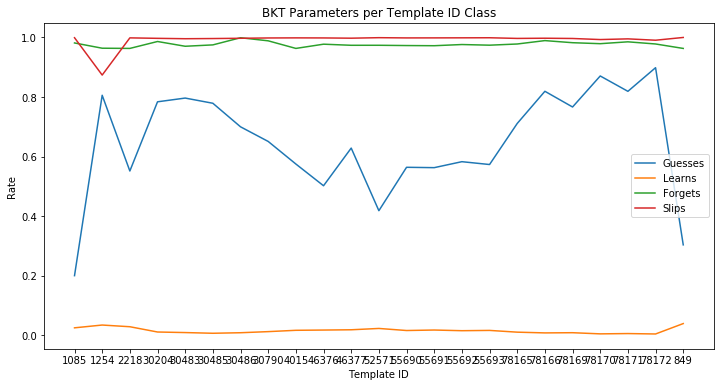

In [45]:
import warnings
warnings.simplefilter(action='ignore')

# Plot the learns, forgets, slips and guesses for each of the classes.
params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class')
plt.legend();

In [46]:
# Extended Data and Model Configuration
config = {'multigs': True,
          'multilearn': True,
          'skills': ['Box and Whisker', 'Circle Graph'],
          'forgets': True,
          'metric': 'accuracy',
          'folds': 4,
          'seed': 42 * 42}
model.crossvalidate(data_path = 'as.csv', **config)

,accuracy
skill,
Circle Graph,0.68050
Box and Whisker,0.75513


In [47]:
# specify the columns corresponding to each required column for other non-Assistments/CogTutor style datasets
defaults = {'order_id': 'custom_order', 
            'skill_name': 'custom_skill', 
            'correct': 'custom_answer'}

# This defaults dictionary can also contain columns specifying
# what columns correspond to the desired guess/slip classes, etc.
defaults['multigs'] = 'custom_gs_classes'

# Our final column mapping is:
defaults

{'order_id': 'custom_order',
 'skill_name': 'custom_skill',
 'correct': 'custom_answer',
 'multigs': 'custom_gs_classes'}

In [51]:
columns = ['Row', 'Anon Student Id', 'KC(Default)','Correct First Attempt', 'Problem Name']
my_df = ct_df[columns]
my_df.columns = ['custom_order', 'Anon Student Id','custom_skill','custom_answer','custom_gs_classes']
my_df['custom_skill'] += ' (Custom)'
my_df.head(5)

,custom_order,Anon Student Id,custom_skill,custom_answer,custom_gs_classes
773,112149,0I891Gg,Plot non-terminating improper fraction (Custom),0,RATIONAL1-014
774,112151,0I891Gg,Plot imperfect radical (Custom),0,RATIONAL1-041
775,112156,0I891Gg,Plot terminating proper fraction (Custom),0,RATIONAL1-104
776,112157,0I891Gg,Plot pi (Custom),1,RATIONAL1-122
777,112159,0I891Gg,Plot terminating proper fraction (Custom),1,RATIONAL1-180


In [52]:
# We can crossvalidate/fit given these default column mappings.
model.crossvalidate(data = my_df, metric = 'auc',defaults = defaults)

,auc
skill,
Plot non-terminating improper fraction (Custom),0.64856
Plot imperfect radical (Custom),0.64175
Plot terminating proper fraction (Custom),0.57077
Plot pi (Custom),0.55061
Plot whole number (Custom),0.52191
Plot decimal - thousandths (Custom),0.62681
Calculate unit rate (Custom),0.58789
Calculate part in proportion with fractions (Custom),0.66632
Calculate total in proportion with fractions (Custom),0.70669


### Sample Case Studies

Question 1: Which model variant has the smallest training loss for "Venn Diagram" in as.csv?

In [54]:
models = {}

model = Model(seed = 42, num_fits = 1)
model.fit(data_path="as.csv", skills="Venn Diagram")
models['simple'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multilearn=True)
models['multilearn'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", multigs=True)
models['multigs'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True)
models['forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True, multigs = True)
models['multigs + forgets'] = model.evaluate(data_path="as.csv")
model.fit(data_path="as.csv", skills="Venn Diagram", forgets=True, multilearn = True)
models['multilearn + forgets'] = model.evaluate(data_path="as.csv")

df = pd.DataFrame(models.items())
df.columns = ['model type', 'RMSE']
df.set_index('model type')

,RMSE
model type,
simple,0.33127
multilearn,0.32946
multigs,0.33994
forgets,0.27896
multigs + forgets,0.31429
multilearn + forgets,0.27093


Question 2: Which columns work the best for the multilearn skills below in ct.csv?

In [55]:
skills = ['Calculate unit rate','Calculate part in proportion with fractions']
column_names = ["Anon Student Id", "Problem Hierarchy", "Problem Name", "Problem View", "Step Name", "Correct First Attempt", 
                "Incorrects", "Hints", "Opportunity(Default)"]
model = Model(num_fits = 1)
for skill in skills:
    print("------------------")
    print("******************")
    print("SKILL: %s" % skill)
    print("Basic:", model.crossvalidate(data_path="ct.csv", skills=skill,metric = 'auc').iloc[0, 0])
    for i in column_names:
        print("%s:" % i, model.crossvalidate(data_path="ct.csv", skills=skill, multilearn=i, metric = 'auc').iloc[0, 0])

------------------
******************
SKILL: Calculate unit rate
Basic: 0.5758811863837751
Anon Student Id: 0.45264177131140243
Problem Hierarchy: 0.5964639089516452
Problem Name: 0.5738369474687298
Problem View: 0.5967703368372461
Step Name: 0.5815386830594255
Correct First Attempt: 0.5907457574885487
Incorrects: 0.5896916535900502
Hints: 0.5869667069601229
Opportunity(Default): 0.5616755823473748
------------------
******************
SKILL: Calculate part in proportion with fractions
Basic: 0.6659042485073614
Anon Student Id: 0.506303782222664
Problem Hierarchy: 0.6663548401469296
Problem Name: 0.6639139689215355
Problem View: 0.6658880250155178
Step Name: 0.6665552816790881
Correct First Attempt: 0.6661885584434383
Incorrects: 0.665828456286305
Hints: 0.6679978325008475
Opportunity(Default): 0.6664503696521793


Question 3: Does binned response time have an effect on the learn rate?
Does it improve the RMSE of the model compared to the normal template_id based multilearn/guess?

RMSE Improvement using Resp. Time: 0.000557


,mean learn rate
class,
less than 10s,0.11750
less than 20s,0.18296
less than 30s,0.18230
less than 40s,0.15115
less than 50s,0.17406
other,0.16894


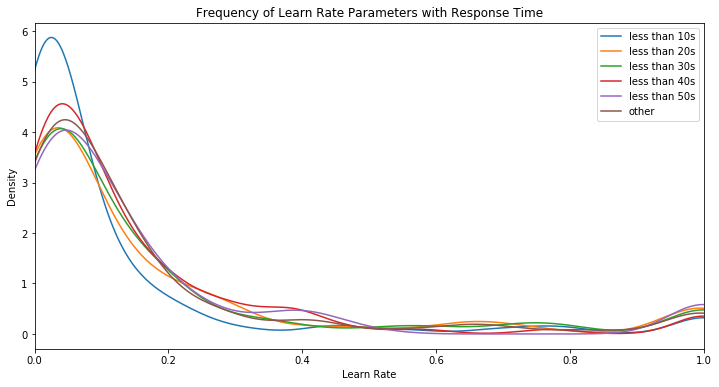

In [56]:
as_df = pd.read_csv('as.csv', encoding = 'latin')
learn_maps = {0: 'less than 10s', 
              1: 'less than 20s', 
              2: 'less than 30s', 
              3: 'less than 40s', 
              4: 'less than 50s'}
as_df['resp_t'] = (as_df['ms_first_response'] // 10000).map(learn_maps).fillna('other')
model.fit(data = as_df, multilearn = 'resp_t')
params_df = model.params().reset_index()
plt.figure(figsize = (12, 6))
params_df[params_df['param'] == 'learns'].groupby('class')['value'].plot.kde(bw_method=0.2)
plt.xlim((0, 1))
plt.legend()
plt.title('Frequency of Learn Rate Parameters with Response Time')
plt.xlabel('Learn Rate')

simple_rmse = model.crossvalidate(data = as_df)
resptime_combo_rmse = model.crossvalidate(data = as_df,multigs = 'resp_t',multilearn = 'resp_t')
normal_combo_rmse = model.crossvalidate(data = as_df,multigs = True, multilearn = True)
rmse_diff = (resptime_combo_rmse - normal_combo_rmse)['rmse'].mean()
print("RMSE Improvement using Resp. Time: %f" % rmse_diff)
params_df[params_df['param'] == 'learns'].groupby('class').mean()[['value']].rename(columns = {'value': 'mean learn rate'})

### Summary

In [60]:
# Let's summarize.
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

# This code fetches data, fits, predicts, evaluates and crossvalidates
# a BKT model on all skills in Cognitive Tutor. It uses the mean absolute
# error as the desired error metric.
model = Model(seed = 42, num_fits = 5)
model.fit(data_path = 'ct.csv')
preds_df = model.predict(data_path = 'ct.csv')
mae_error = model.evaluate(data_path = 'ct.csv', metric = mae)
cv_errors = model.crossvalidate(data_path = 'ct.csv', metric = mae)
print("Training MAE: %f" % mae_error)
cv_errors

Training MAE: 0.412872


,mae
skill,
Plot non-terminating improper fraction,0.46431
Plot imperfect radical,0.37944
Plot terminating proper fraction,0.49237
Plot pi,0.42817
Plot whole number,0.16973
Plot decimal - thousandths,0.44684
Calculate unit rate,0.46568
Calculate part in proportion with fractions,0.36594
Calculate total in proportion with fractions,0.36150
